In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Dense,BatchNormalization,Input,Bidirectional,Conv1D,MaxPooling1D,Flatten
from tensorflow.keras import regularizers
import tensorflow as tf
import numpy as np

In [3]:
f = open("file.txt", "r")
data = f.read()


In [18]:
import re
x = re.split('loss: | - accuracy: | - val_loss: | - val_accuracy: |\nEpoch ', data)
x_list = []
for i in x:
    if i[0] == '0':
        x_list.append(i)

In [26]:
x_list

['0.5955',
 '0.6710 - lr: 0.001\n204/204 [==============================] - 15s 66ms/step - ',
 '0.5954',
 '0.6711',
 '0.5983',
 '0.6700',
 '0.6246',
 '0.6376 - lr: 0.001\n204/204 [==============================] - 12s 60ms/step - ',
 '0.6245',
 '0.6378',
 '0.6213',
 '0.6640',
 '0.6415',
 '0.6457 - lr: 0.00096000003\n204/204 [==============================] - 12s 60ms/step - ',
 '0.6416',
 '0.6456',
 '0.6609',
 '0.5590',
 '0.6418',
 '0.6251 - lr: 0.00096000003\n204/204 [==============================] - 12s 61ms/step - ',
 '0.6418',
 '0.6252',
 '0.6000',
 '0.6887',
 '0.6221',
 '0.6514 - lr: 0.0009216\n204/204 [==============================] - 12s 60ms/step - ',
 '0.6221',
 '0.6514',
 '0.5990',
 '0.6752',
 '0.6325',
 '0.6144 - lr: 0.0009216\n204/204 [==============================] - 12s 61ms/step - ',
 '0.6325',
 '0.6143',
 '0.6328',
 '0.6340',
 '0.6354',
 '0.6367 - lr: 0.0008847359\n204/204 [==============================] - 12s 61ms/step - ',
 '0.6353',
 '0.6367',
 '0.6051',
 '0.641

In [83]:
lost = [[],[],[],[]]
for i in range(2,len(x_list),6):
    lost[0].append(x_list[i])
for i in range(3,len(x_list),6):
    lost[1].append(x_list[i])
for i in range(4,len(x_list),6):
    lost[2].append(x_list[i])
for i in range(5,len(x_list),6):
    lost[3].append(x_list[i])

In [85]:
fold_1 = pd.DataFrame(np.asarray(lost,dtype = np.float32).T,columns = ['loss','accuracy','val_loss','val_accuracy'])

In [96]:
fold_1['epoch'] = fold_1.index

In [97]:
df = [fold_1]
for i in range(1,5):
    df.append(pd.read_csv(f'history_log_{i}.csv'))

In [98]:
model = Sequential([
    LSTM(100, kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), bias_regularizer=regularizers.L2(1e-4), input_shape=(256,3)),
    Dropout(0.2),

    Dense(2, activation = 'softmax') 
])

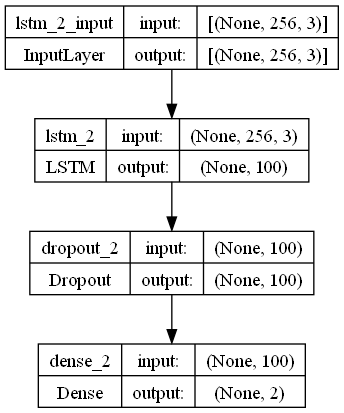

In [99]:
tf.keras.utils.plot_model(model, show_shapes=True)

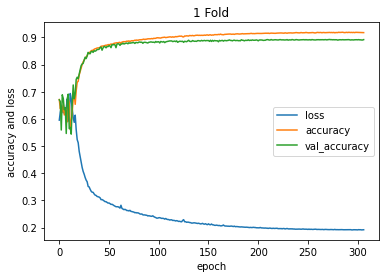

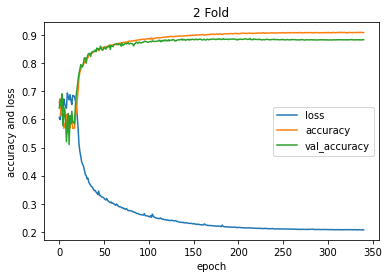

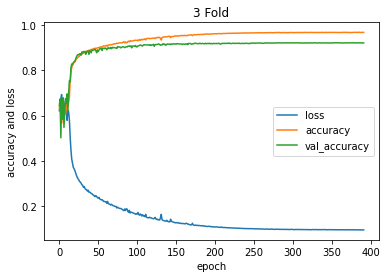

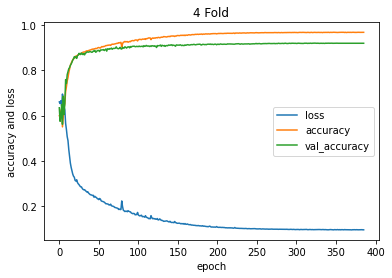

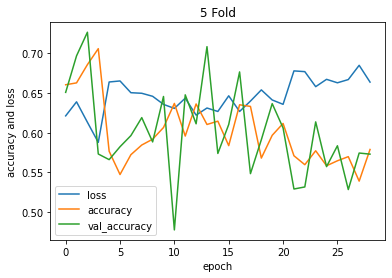

In [100]:
for i in range(len(df)):
    plot = df[i][:].reset_index()[['loss','accuracy','val_accuracy']].plot(title = f'{i+1} Fold',xlabel = 'epoch',ylabel = 'accuracy and loss')
    fig = plot.get_figure()
    fig.savefig(f'{i}_fold.png')

In [101]:
from IPython.display import display
for i in range(len(df)):
    display(df[i][df[i]['epoch']==0])

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.5954,0.6711,0.5983,0.67,0


,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.66021,0.60651,0.640325,0.6341


,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.630289,0.621653,0.643956,0.603045


,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.599254,0.660575,0.634792,0.636676


,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.66046,0.621263,0.650873,0.678346


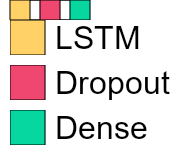

In [102]:
from PIL import ImageFont
import visualkeras
font = ImageFont.truetype("arial.ttf", 32)  # using comic sans is strictly prohibited!
visualkeras.layered_view(model, legend=True, font=font,draw_volume=False)  # font is optional!

In [103]:
table = []
for i in range(len(df)):
    display(df[i][df[i]['val_accuracy'] == df[i]['val_accuracy'].max()][:1])
    table.append(df[i][df[i]['val_accuracy'] == df[i]['val_accuracy'].max()][:1])
table = pd.concat(table)

,loss,accuracy,val_loss,val_accuracy,epoch
272,0.1923,0.9182,0.2696,0.8923,272


,epoch,accuracy,loss,val_accuracy,val_loss
213,213,0.907375,0.214247,0.888812,0.265539


,epoch,accuracy,loss,val_accuracy,val_loss
302,302,0.966159,0.097817,0.920975,0.246938


,epoch,accuracy,loss,val_accuracy,val_loss
323,323,0.968196,0.095729,0.920629,0.254017


,epoch,accuracy,loss,val_accuracy,val_loss
2,2,0.685807,0.613243,0.726613,0.567503


In [104]:
import pickle

# open a file, where you stored the pickled data
file = open('scores', 'rb')
# dump information to that file
scores = pickle.load(file)
# close the file
file.close()

# open a file, where you stored the pickled data
file = open('evaluations', 'rb')
# dump information to that file
evaluations = pickle.load(file)
# close the file
file.close()


In [105]:
scores = np.asarray(scores).T

In [106]:
scores

array([[0.8701699 , 0.8703204 , 0.8700194 ],
       [0.8550865 , 0.8553825 , 0.85479075],
       [0.84344184, 0.84364617, 0.84323764],
       [0.84870076, 0.8489064 , 0.8484953 ],
       [0.7249767 , 0.72515225, 0.7248011 ]], dtype=float32)

In [107]:
df3 = pd.DataFrame(scores,columns = ['f1','recalls','precisions'])

In [108]:
df3

,f1,recalls,precisions
0,0.870170,0.870320,0.870019
1,0.855087,0.855383,0.854791
2,0.843442,0.843646,0.843238
3,0.848701,0.848906,0.848495
4,0.724977,0.725152,0.724801


In [109]:
np.asarray(evaluations)[:,1]

array([0.87008852, 0.85527498, 0.84330684, 0.84863371, 0.72507781])

In [110]:
df3

,f1,recalls,precisions
0,0.870170,0.870320,0.870019
1,0.855087,0.855383,0.854791
2,0.843442,0.843646,0.843238
3,0.848701,0.848906,0.848495
4,0.724977,0.725152,0.724801


In [111]:
df2 = table[['accuracy','val_accuracy','epoch']].reset_index()
df2 = pd.concat([df2,df3],axis = 1)
df2['test_accuracy'] = np.asarray(evaluations)[:,1]


In [112]:
s = pd.DataFrame([df2.sum()])/5

In [113]:
df2 = pd.concat([df2,s])

In [114]:
df2 = ((df2*10000)//1)/10000

In [115]:
df2.to_csv('table.csv')

In [116]:
df2

,index,accuracy,val_accuracy,epoch,f1,recalls,precisions,test_accuracy
0,272.0,0.9182,0.8923,272.0,0.8701,0.8703,0.8700,0.8700
1,213.0,0.9073,0.8888,213.0,0.8550,0.8553,0.8547,0.8552
2,302.0,0.9661,0.9209,302.0,0.8434,0.8436,0.8432,0.8433
3,323.0,0.9681,0.9206,323.0,0.8487,0.8489,0.8484,0.8486
4,2.0,0.6858,0.7266,2.0,0.7249,0.7251,0.7248,0.7250
0,222.4,0.8891,0.8698,222.4,0.8284,0.8286,0.8282,0.8284
